<a href="https://colab.research.google.com/github/pquynhvu/TDA/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # linear algebra
import pandas as pd # data processing
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)) # add color channel
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
x_train, x_test = x_train/255.0, x_test/255.0
label_train = to_categorical(y_train) # one-hot encoding

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


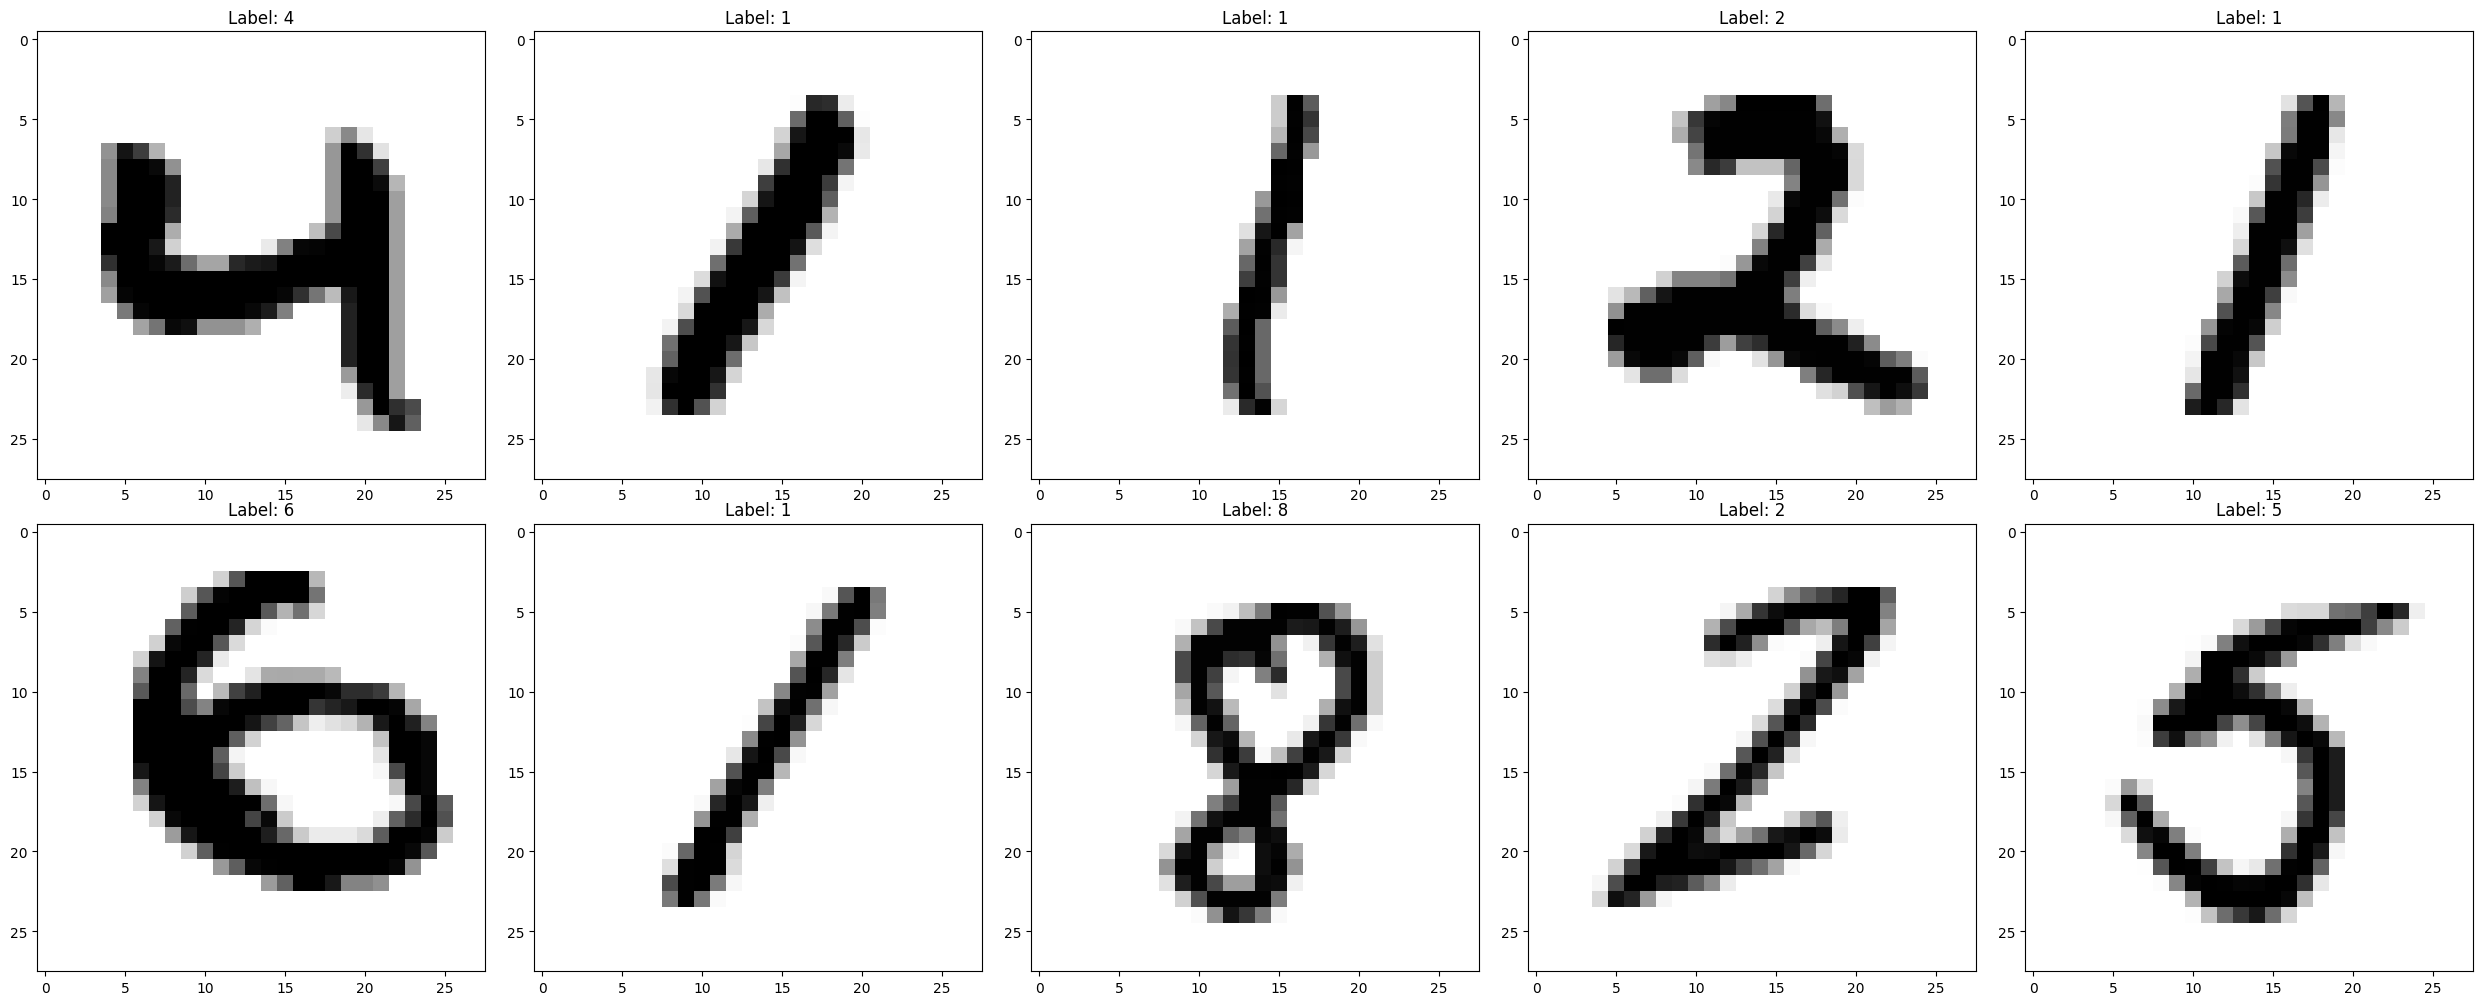

In [3]:
num_row, num_col = 2, 5

idx = np.random.randint(low=0, high=x_train.shape[0], size=(num_row*num_col,)) # subset 10 figures
x_train10, y_train10 = x_train[idx], y_train[idx]

# visualize
fig, axs = plt.subplots(num_row, num_col, figsize=(25, 10))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(('Label: {}'.format(y_train10[i])))
    ax.imshow(x_train10[i], cmap=cm.binary)

plt.tight_layout()
plt.show()

In [4]:
mnist_cnn = models.Sequential()
mnist_cnn.add(Conv2D(filters = 7, kernel_size = (4,4),padding = 'Same', activation ='relu', input_shape = (28,28,1))) # convo + ReLU
mnist_cnn.add(MaxPool2D(pool_size=(4,4))) # pooling
mnist_cnn.add(Conv2D(filters = 14, kernel_size = (4,4),padding = 'Same', activation ='relu')) # convo + ReLU
mnist_cnn.add(MaxPool2D(pool_size=(4,4), strides=(2,2)))
mnist_cnn.add(Flatten())
mnist_cnn.add(Dense(256, activation = "relu"))
mnist_cnn.add(Dense(10, activation = "softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# compile the model
mnist_cnn.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics=["accuracy"])